In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def S(r:float):
    """ Integral de traslape
        molécula de hidrógeno ionizada
        
    r : distancia interatómica
    """
    return np.exp(-r) * ((1/3) * np.square(r) + r + 1)

In [3]:
def J(r:float):
    """ Integral Coulombiana
        molécula de hidrógeno ionizada
        
    r : distancia interatómica
    """
    return np.exp(-2*r) * (1 + 1/r) - (1/r)

In [4]:
def K(r:float):
    """ Integral de intercambio
        molécula de hidrógeno ionizada
        
    r : distancia interatómica
    """
    return -np.exp(-r) * (1+r)

In [5]:
def HAA(r):
    return -1/2 + 1/r + J(r)

In [6]:
def HAB(r):
    return (1/r - 1/2) * S(r) + K(r)

In [7]:
def E(r:np.ndarray, signo:int):
    """ Energía
        molécula de hidrógeno ionizada

    r : distancia interatómica
    signo : (1,-1) es el caso (ligante, antiligante)
    """
    return (HAA(r) + signo*HAB(r))/(1 + signo*S(r))

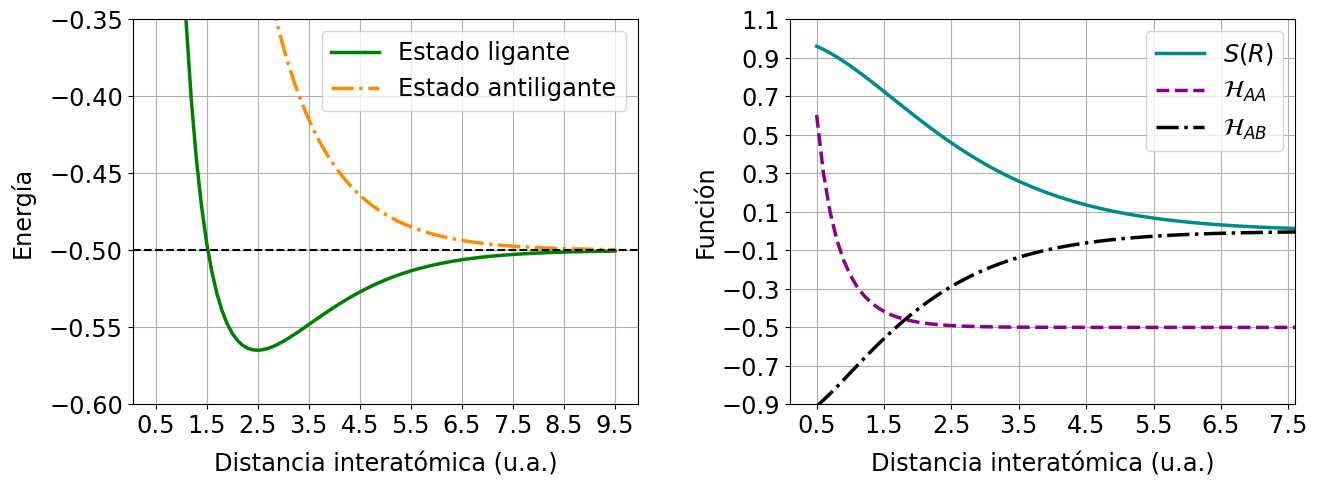

In [17]:
linewidth = 2.5
name = 'energia_ion_hidrogeno_molecular'

r1min, r1max = 0.5, 9.6
y1min = -0.6
r1 = np.arange(r1min,r1max,0.1)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(r1, E(r1,1), label='Estado ligante', linewidth=linewidth, color='green', linestyle='-')
axs[0].plot(r1, E(r1,-1), label='Estado antiligante', linewidth=linewidth, color='darkorange', linestyle='-.')
axs[0].axhline(y = -0.5, color='black', linestyle='dashed')
axs[0].tick_params(axis='both', which='major', labelsize='xx-large')

axs[0].set_xticks(np.arange(r1min,r1max,1))
axs[0].set_xlabel('Distancia interatómica (u.a.)', fontsize='xx-large', labelpad=10)

axs[0].set_yticks(np.arange(y1min,0.7,0.05))
axs[0].set_ylim(bottom=y1min,top=-0.35)
axs[0].set_ylabel('Energía', fontsize='xx-large', labelpad=10)

r2min, r2max = 0.5, 7.6
y2min = -0.9
r2 = np.arange(r2min, r2max+1, 0.1)
axs[1].plot(r2, S(r2), label=r'$S(R)$', linewidth=linewidth, color='darkcyan', linestyle='-')
axs[1].plot(r2, -1/2 + 1/r2 + J(r2), label=r'$\mathcal{H}_{AA}$', linewidth=linewidth, color='darkmagenta', linestyle='--')
axs[1].plot(r2, (1/r2 - 1/r2)*S(r2) + K(r2), label=r'$\mathcal{H}_{AB}$', linewidth=linewidth, color='black', linestyle='-.')
axs[1].tick_params(axis='both', which='major', labelsize='xx-large')

axs[1].set_xticks(np.arange(r2min, r2max, 1))
axs[1].set_xlim(left=r2min-0.4, right=r2max)
axs[1].set_xlabel('Distancia interatómica (u.a.)', fontsize='xx-large', labelpad=10)

axs[1].set_yticks(np.arange(y2min,1.2,0.2))
axs[1].set_ylim(bottom=y2min,top=1.1)
axs[1].set_ylabel('Función', fontsize='xx-large', labelpad=3)

for ax in axs:
    ax.legend(fontsize='xx-large', loc='upper right')
    ax.grid()

fig.subplots_adjust(wspace=0.3)

plt.savefig(f"imgs/{name}.svg", format="svg")
plt.show()